In [1]:
from core import *
import matplotlib.pyplot as plt

ramans = ramanfrom(path='./muestras/coffe_mate')

In [2]:
ramans.ramanspecs

{'20.06.2023 12:06:11': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_14.txt,
 '20.06.2023 12:04:10': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_12.txt,
 '20.06.2023 11:53:08': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_04.txt,
 '20.06.2023 12:05:00': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_13.txt,
 '20.06.2023 11:49:04': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_01.txt,
 '20.06.2023 12:07:11': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_15.txt,
 '20.06.2023 11:57:19': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_08.txt,
 '20.06.2023 11:58:14': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_09.txt,
 '20.06.2023 11:55:34': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_06.txt,
 '20.06.2023 12:03:20': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_11.txt,
 '20.06.2023 11:56:20': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_07.txt,
 '20.06.2023 11:59:11': RamanSpectrum (repr): ./muestras/coffe_mate/Organic_

In [3]:
for e in ramans.ramans:
    print(e)

RamanSpectrum (str): ./muestras/coffe_mate/Organic_14.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_12.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_04.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_13.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_01.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_15.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_08.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_09.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_06.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_11.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_07.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_10.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_03.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_02.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_16.txt
RamanSpectrum (str): ./muestras/coffe_mate/Organic_05.txt


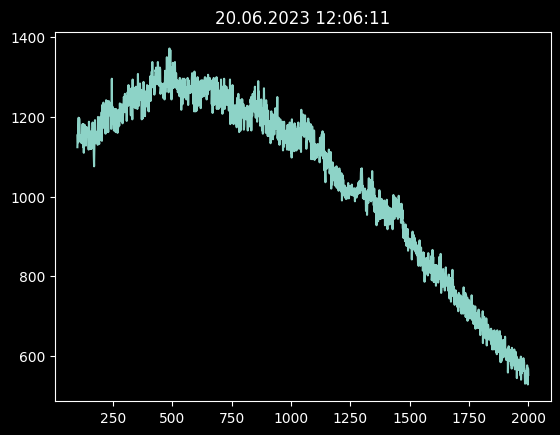

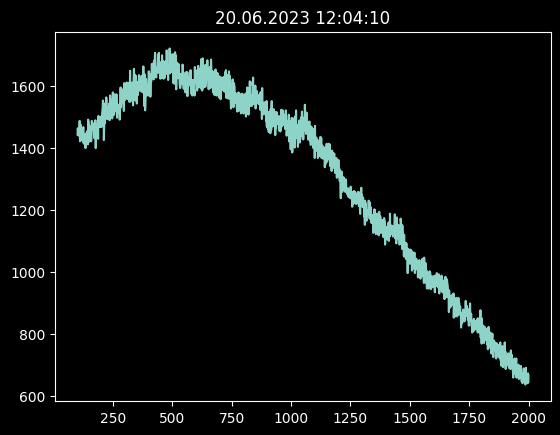

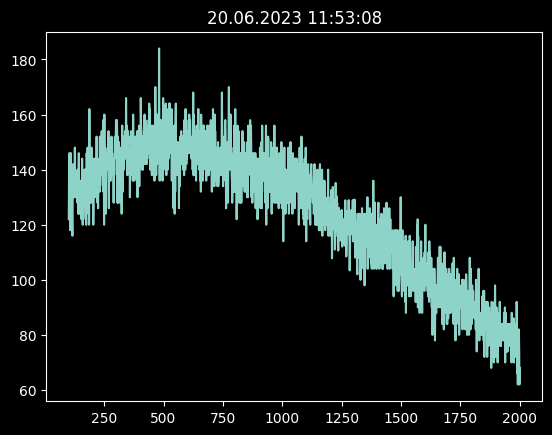

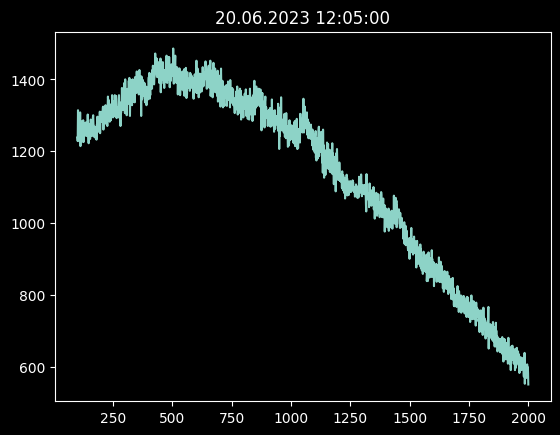

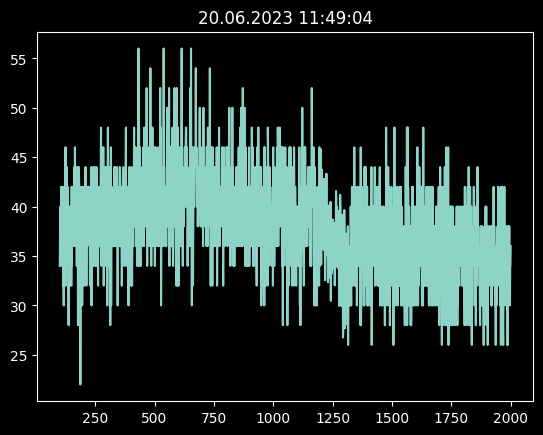

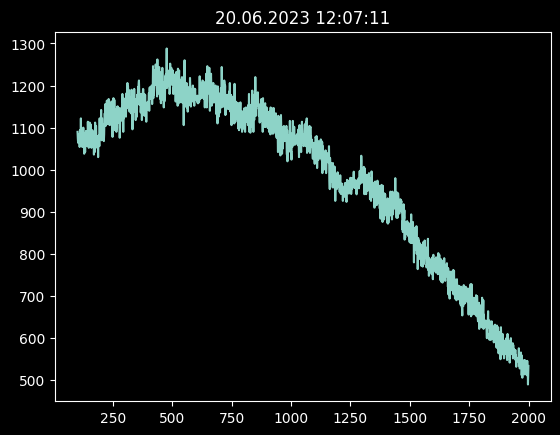

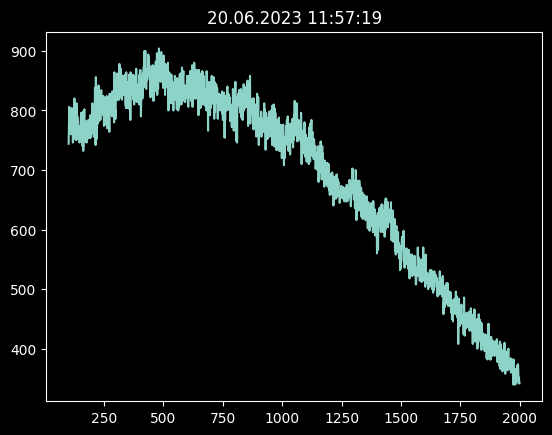

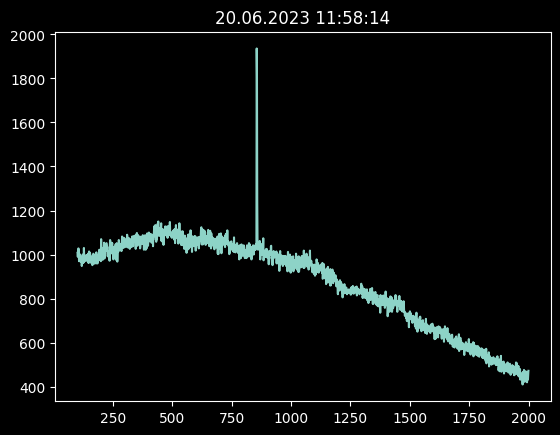

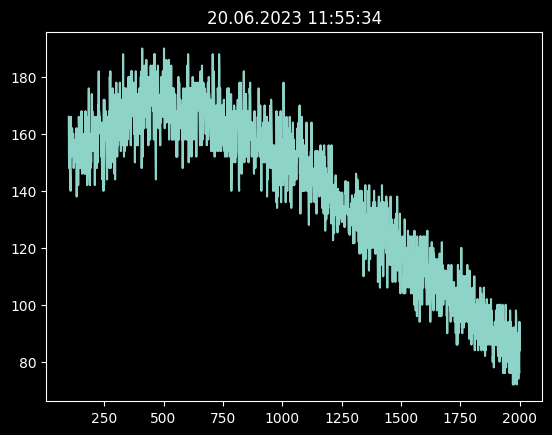

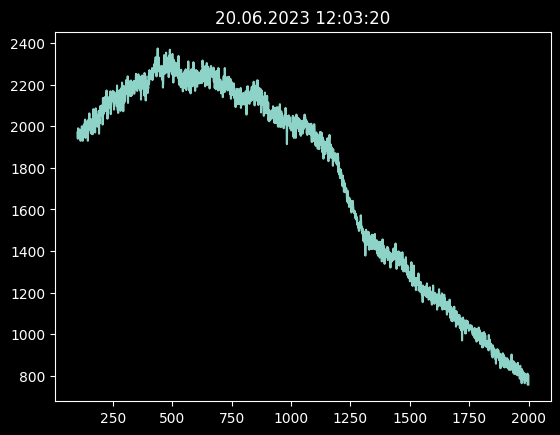

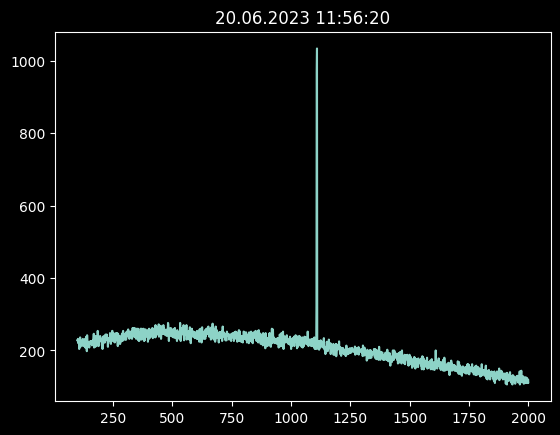

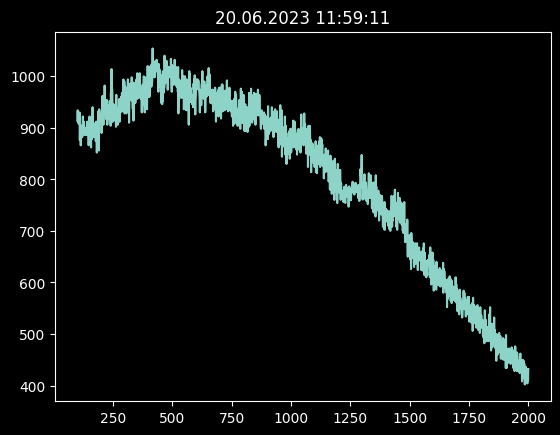

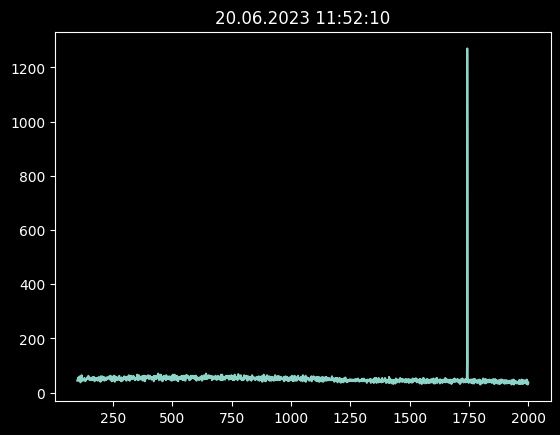

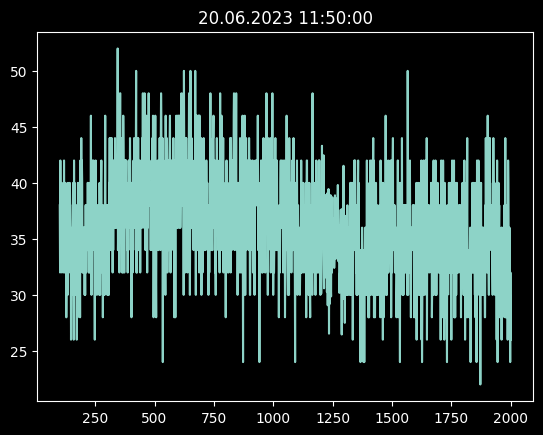

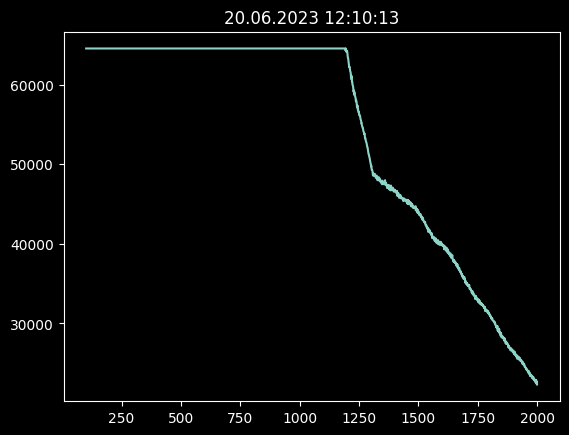

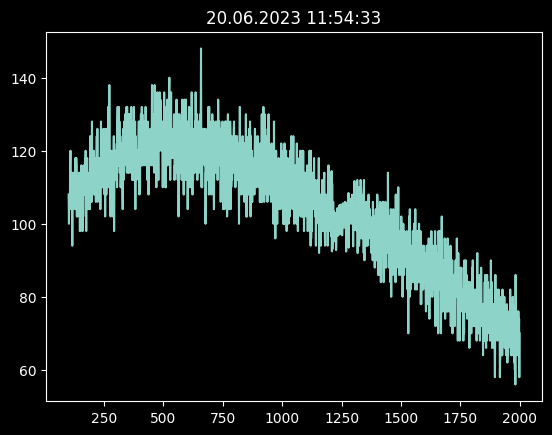

In [4]:
for k,v in ramans.ramanspecs.items():
    plt.figure()
    plt.title(k)
    plt.plot(v.x, v.y)
    plt.show()

In [5]:
ramans.date='20.06.2023 '

removespecs = ['12:03:20','12:10:13']

for e in removespecs:
    ramans.pop(e)

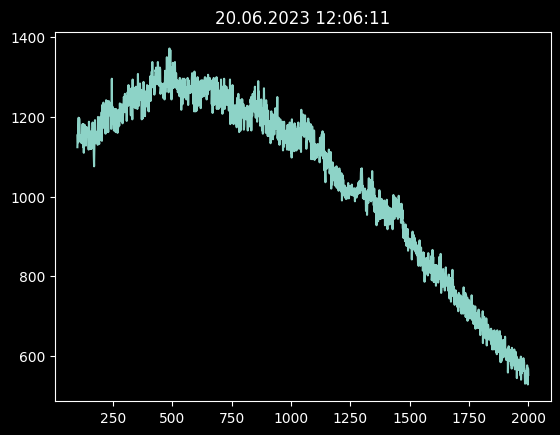

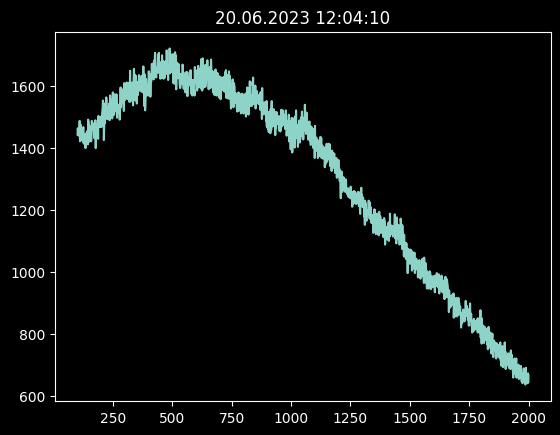

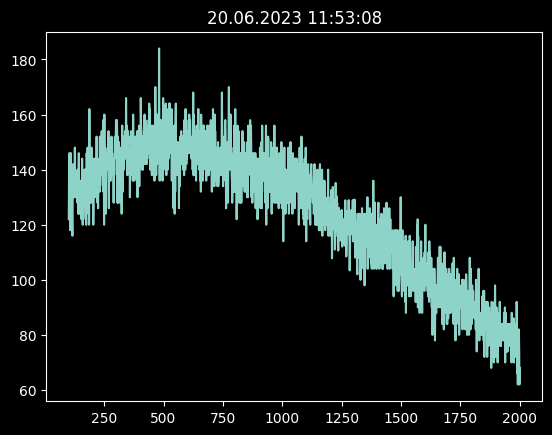

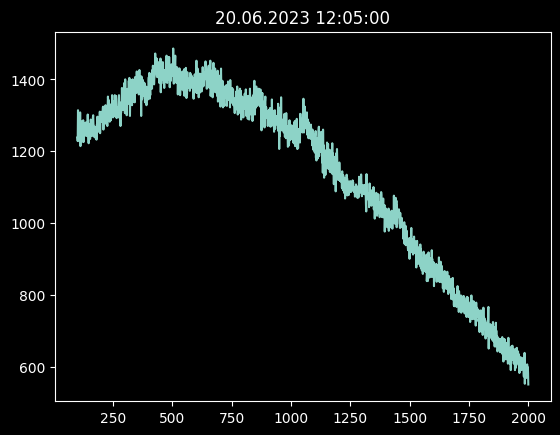

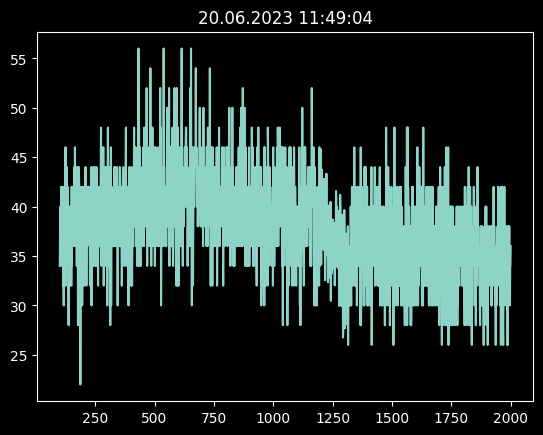

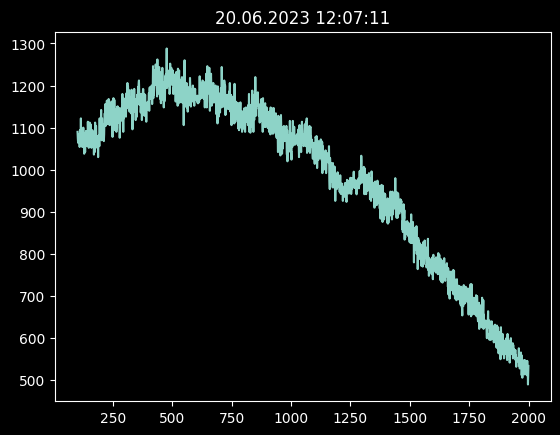

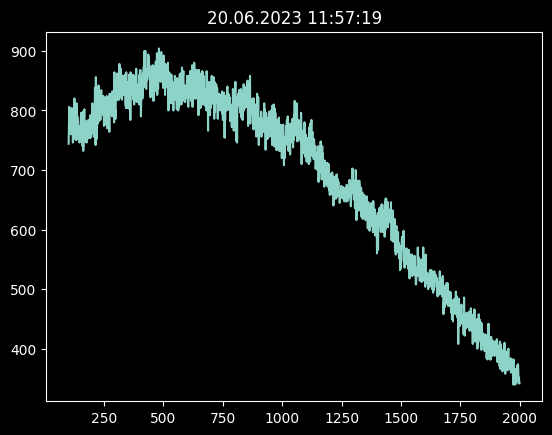

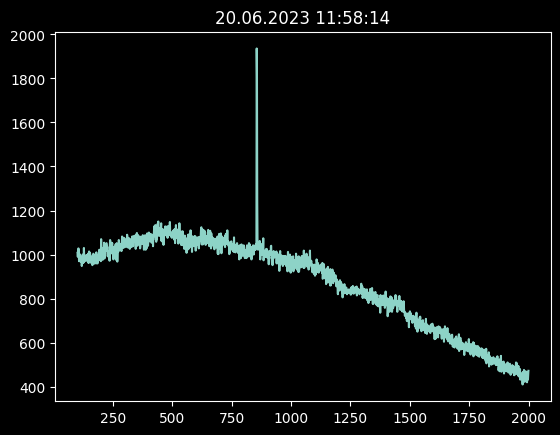

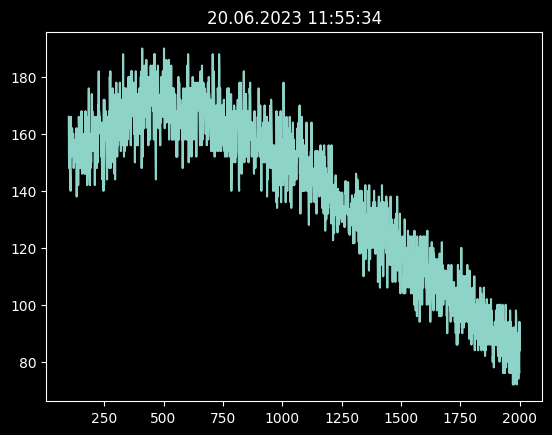

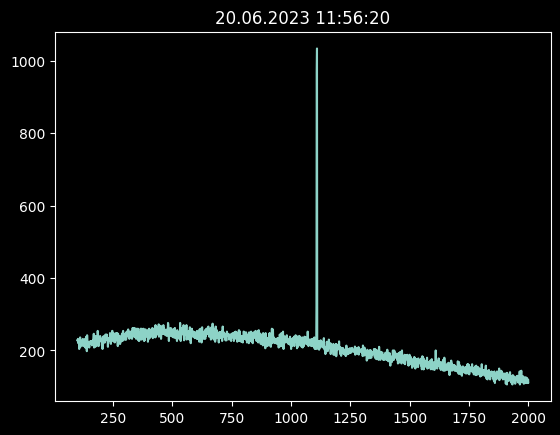

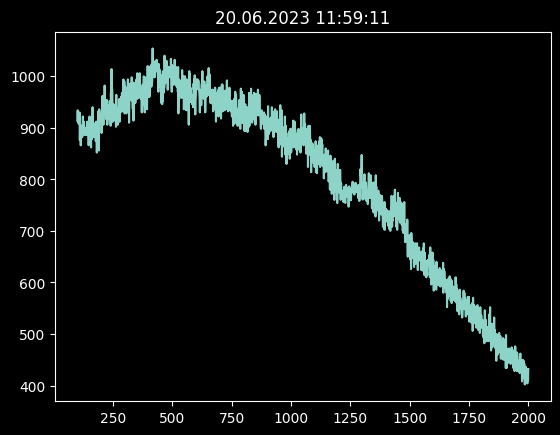

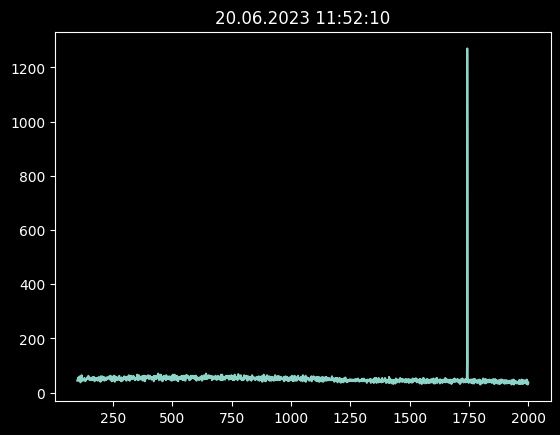

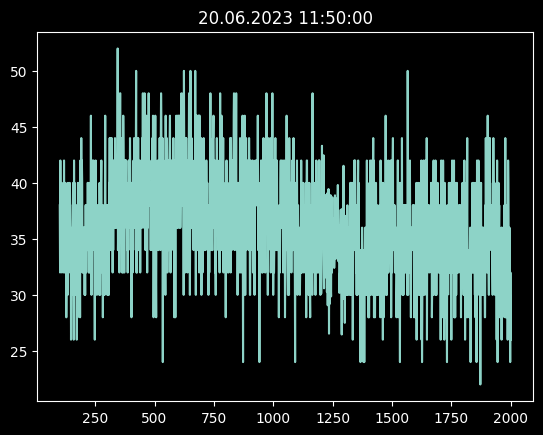

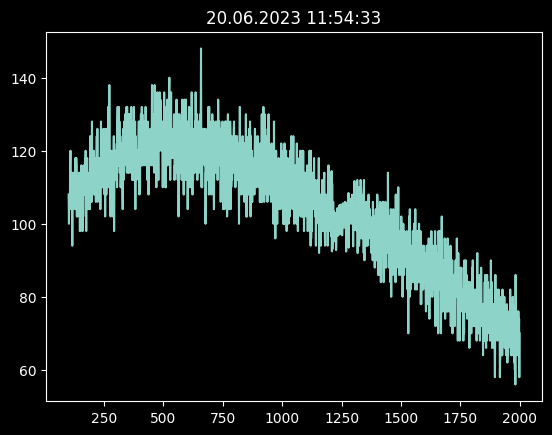

In [6]:
for k, v in ramans.ramanspecs.items():
    plt.figure()
    plt.title(k)
    plt.plot(v.x, v.y)
    plt.show()

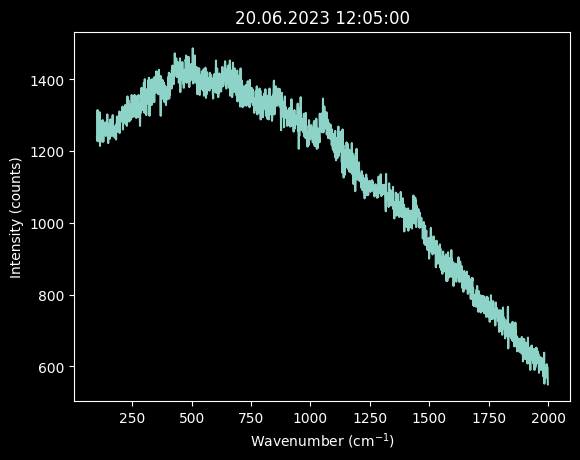

<Figure size 640x480 with 0 Axes>

In [7]:
r = ramans.randomspec()
r.plot()

In [9]:
r.interactive(mod=True, method='poly_fit')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

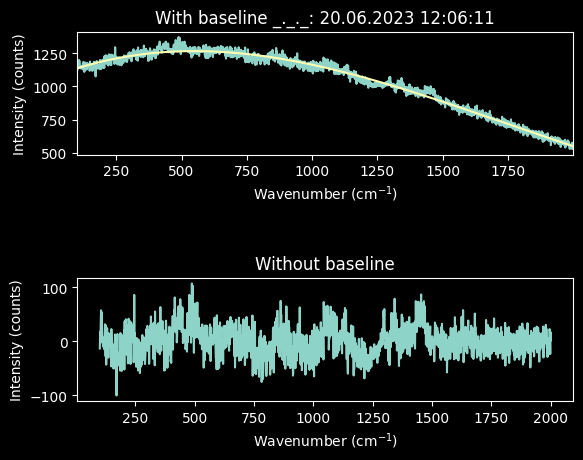

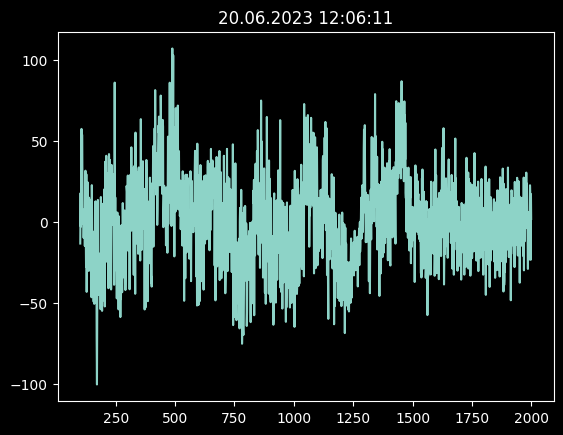

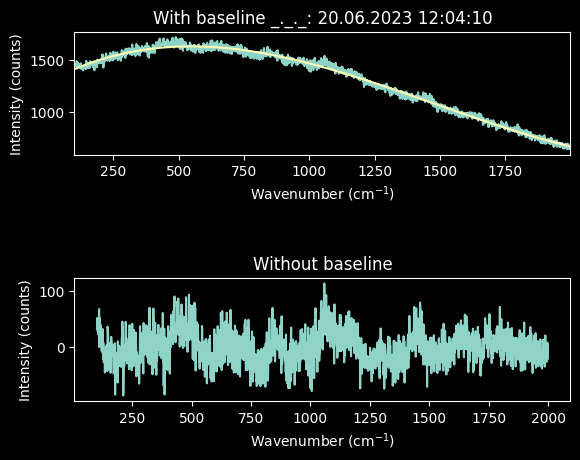

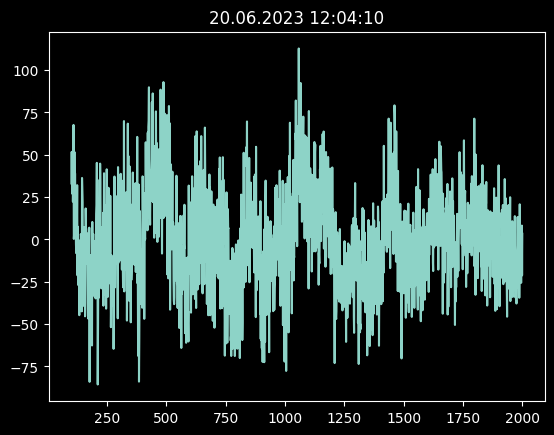

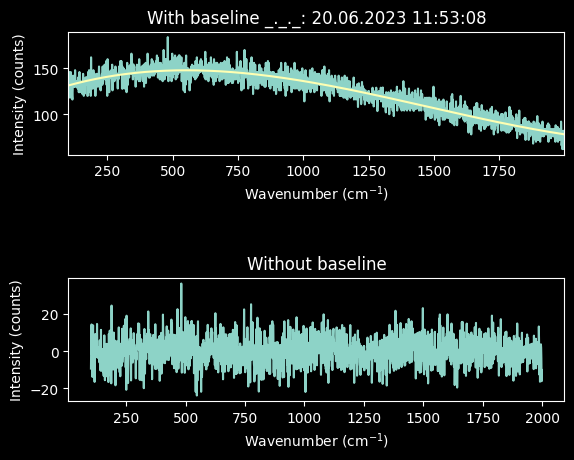

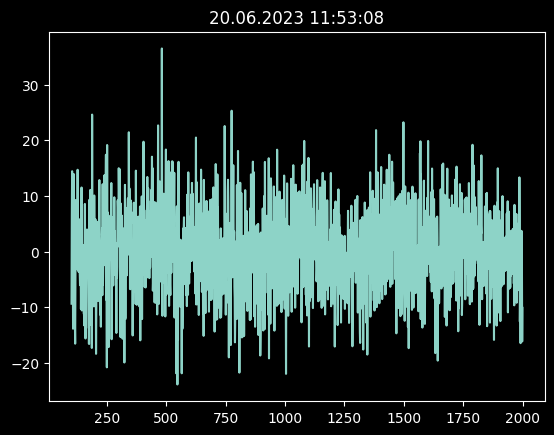

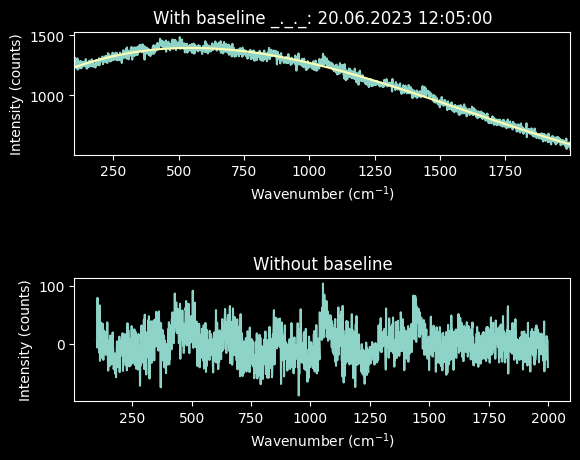

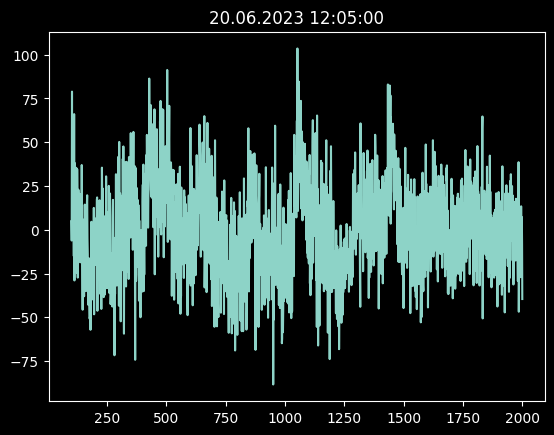

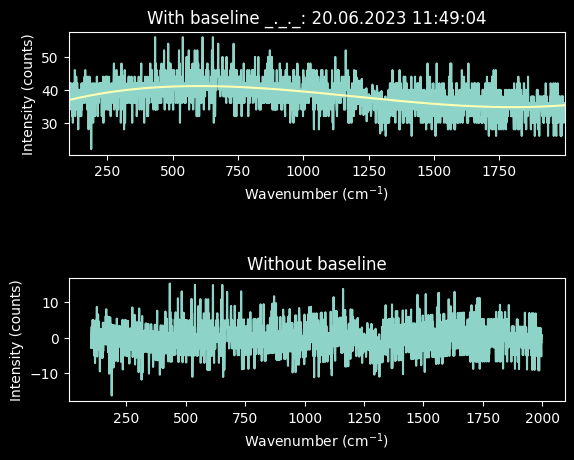

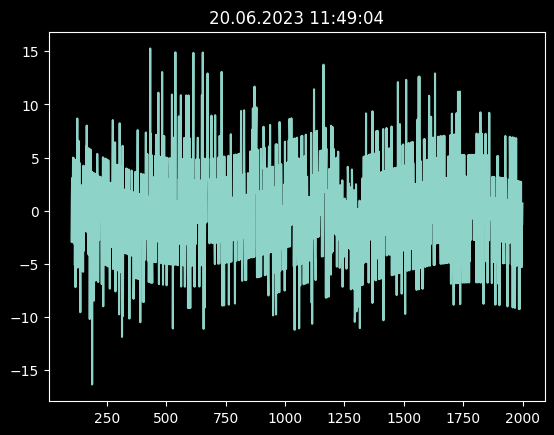

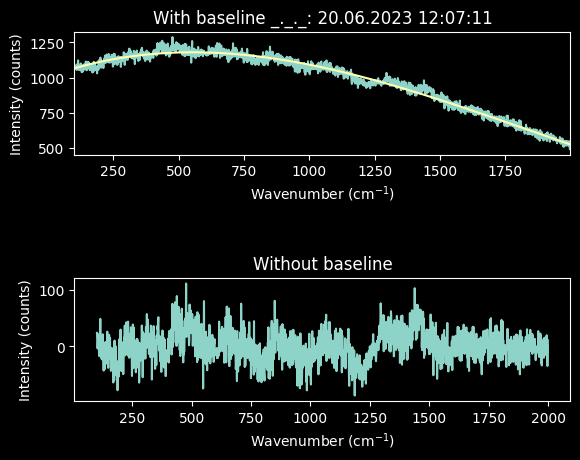

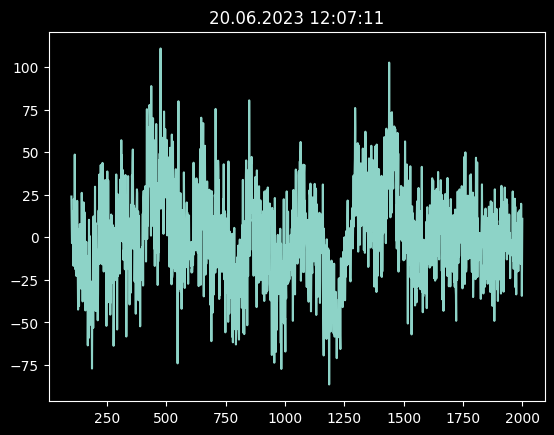

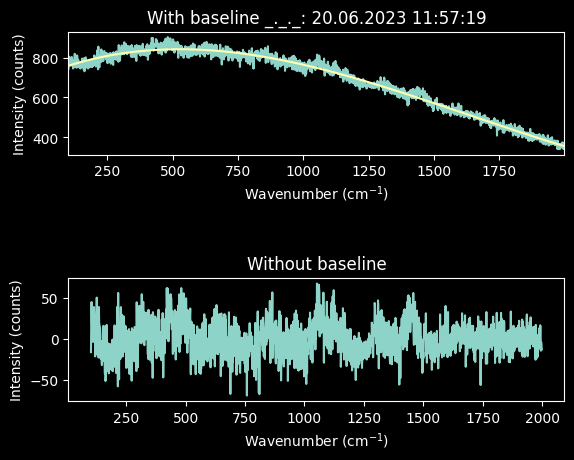

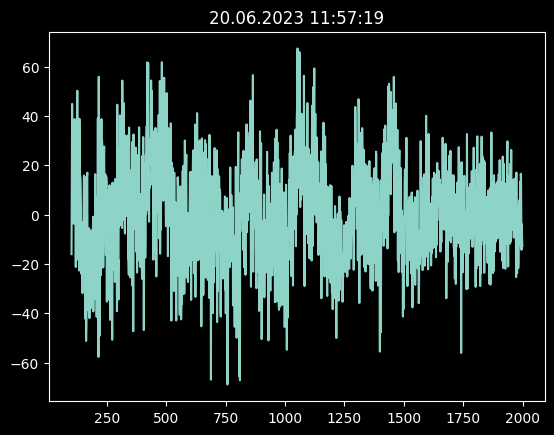

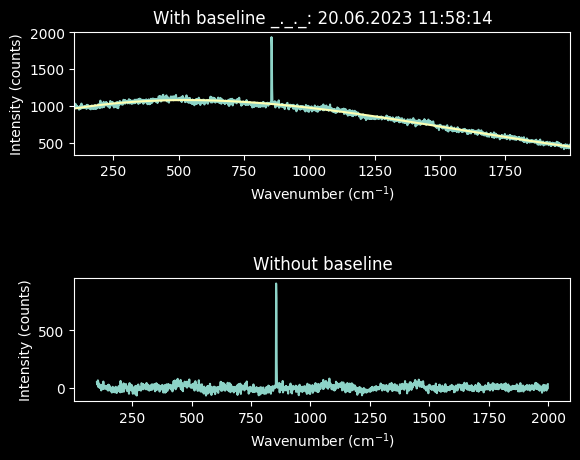

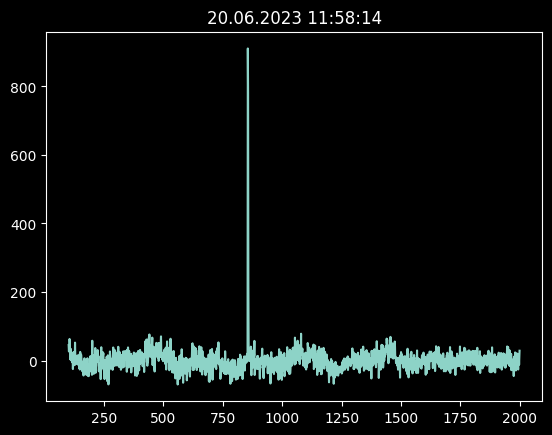

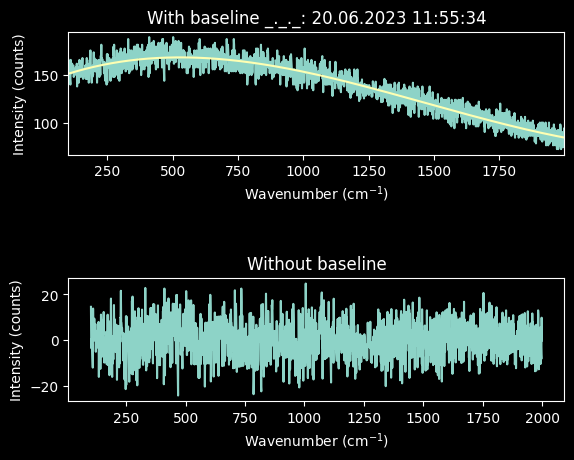

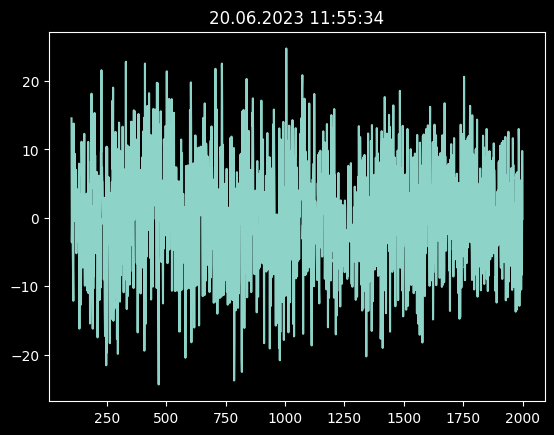

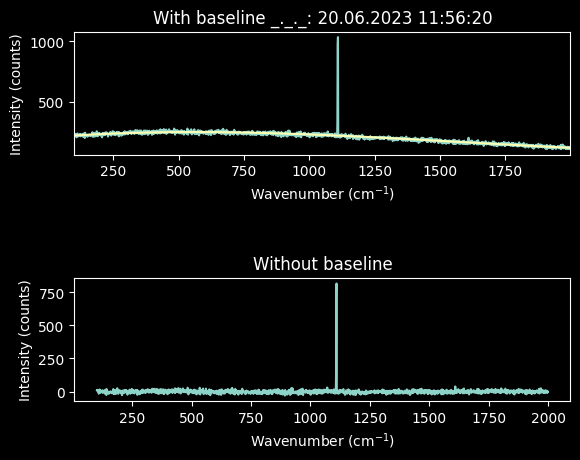

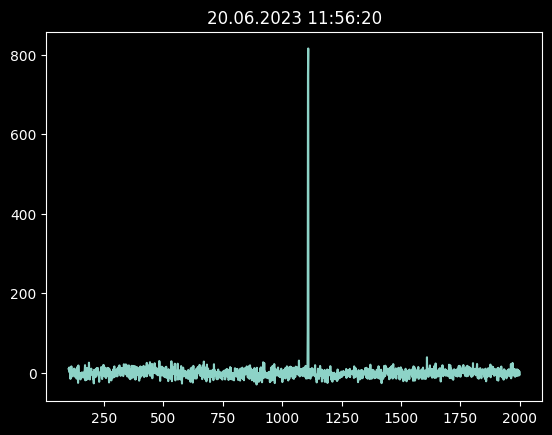

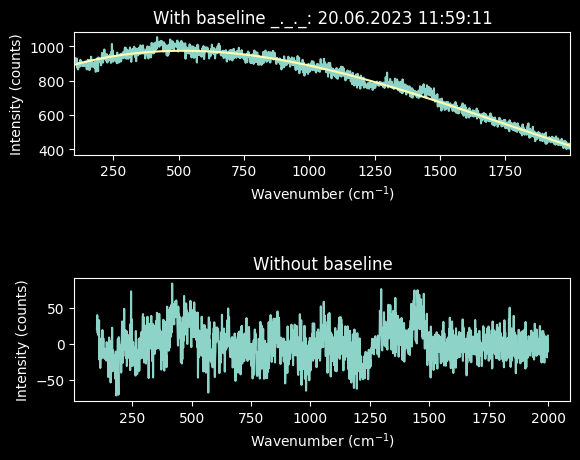

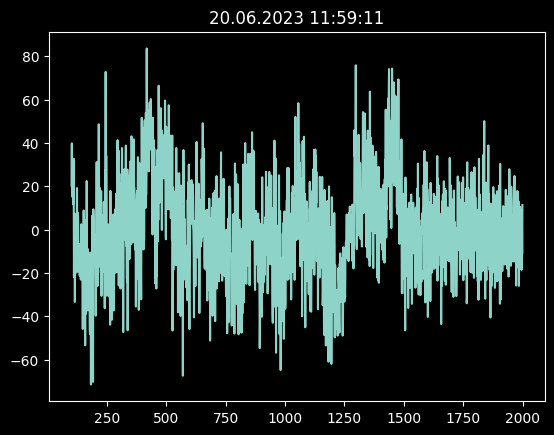

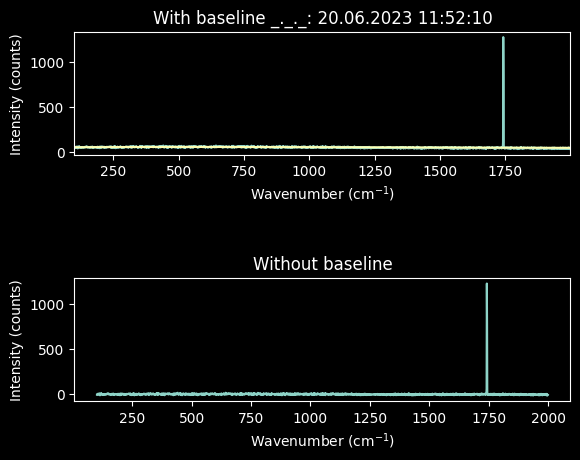

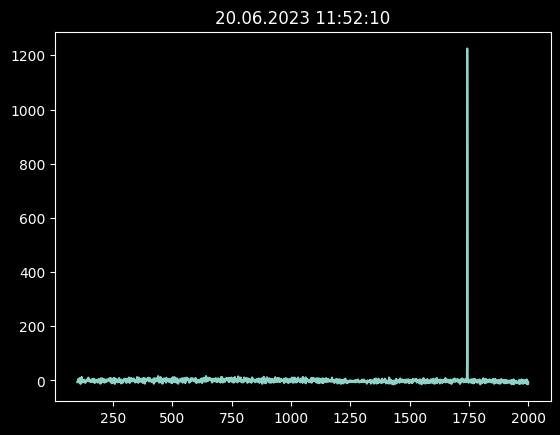

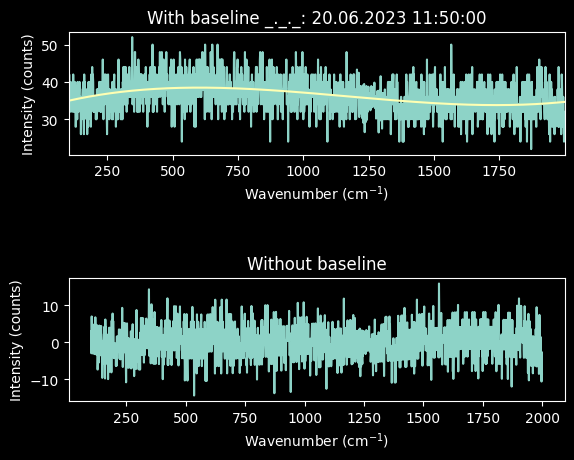

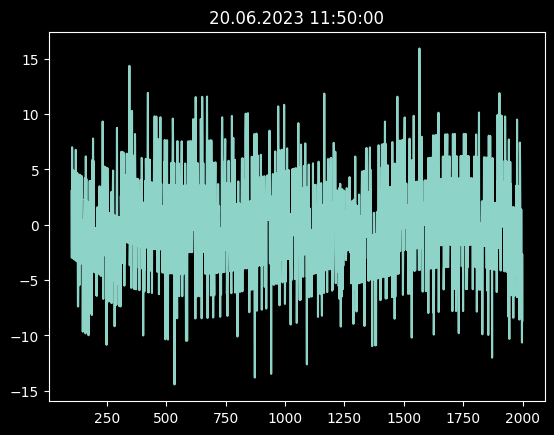

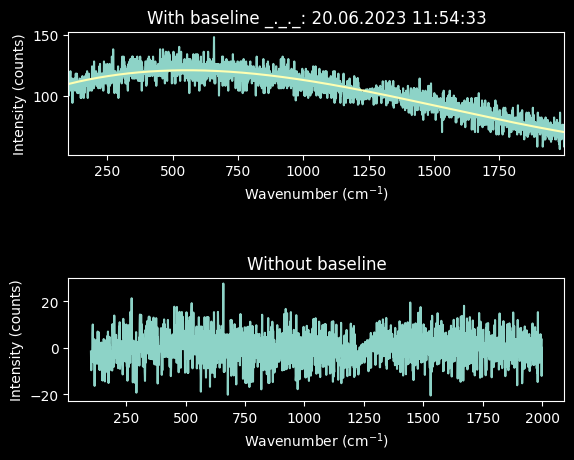

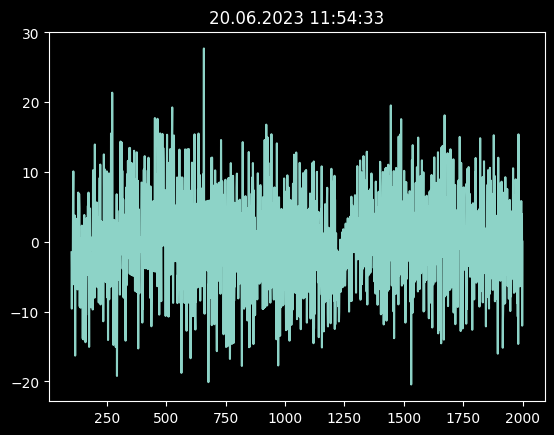

In [8]:
for k, v in ramans.ramanspecs.items():
    v.polyfit()
    plt.title(k)
    plt.plot(v.polylx, v.polyly)
    plt.show()

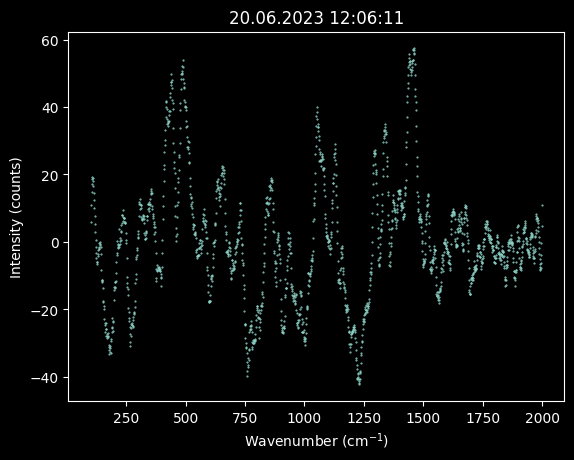

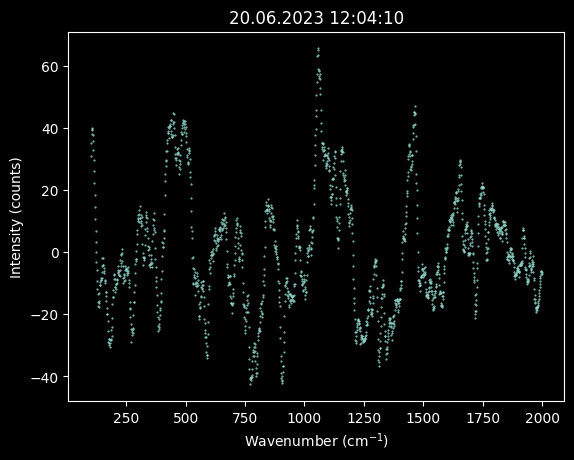

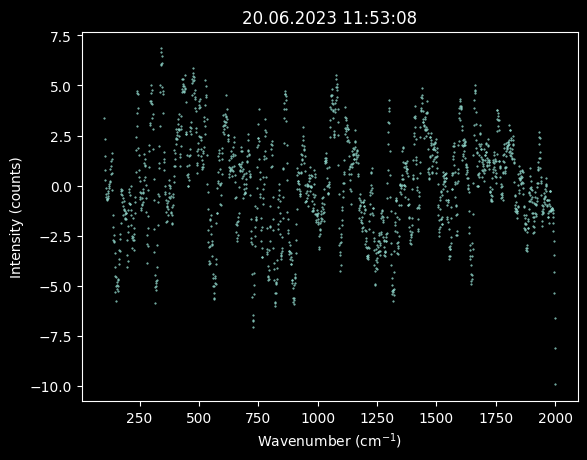

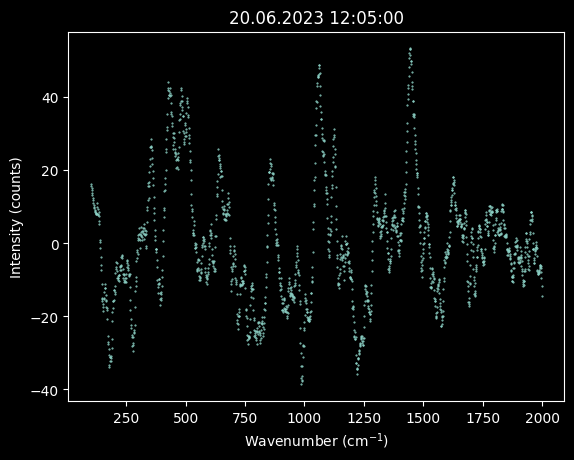

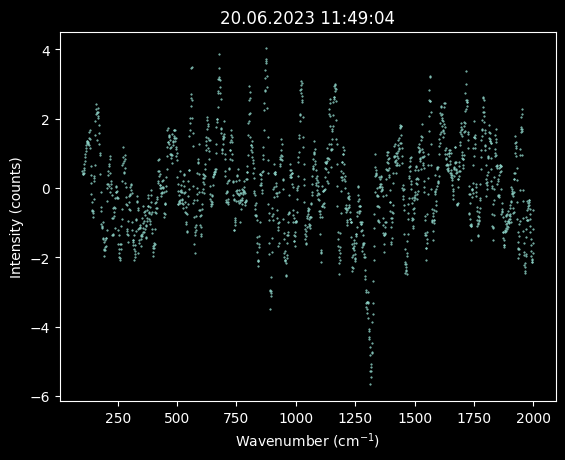

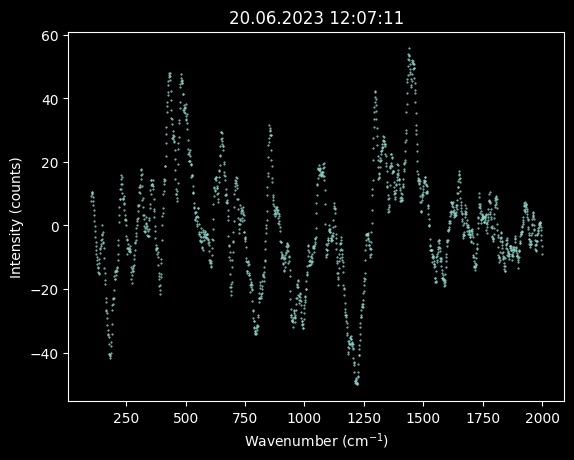

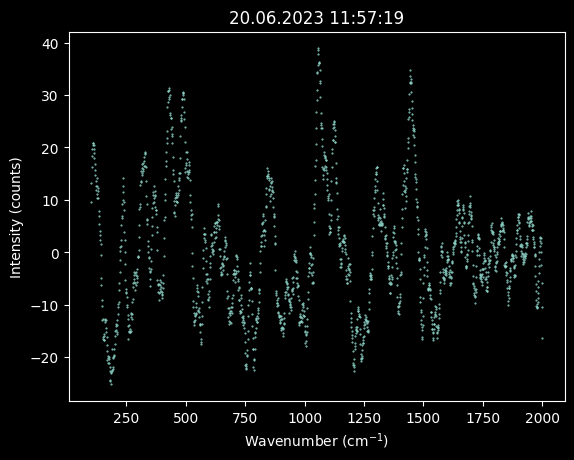

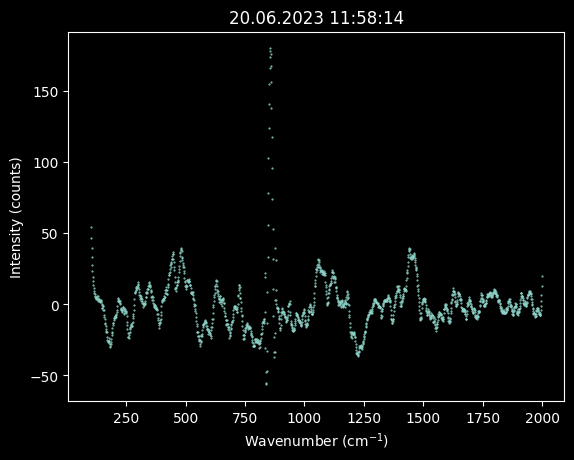

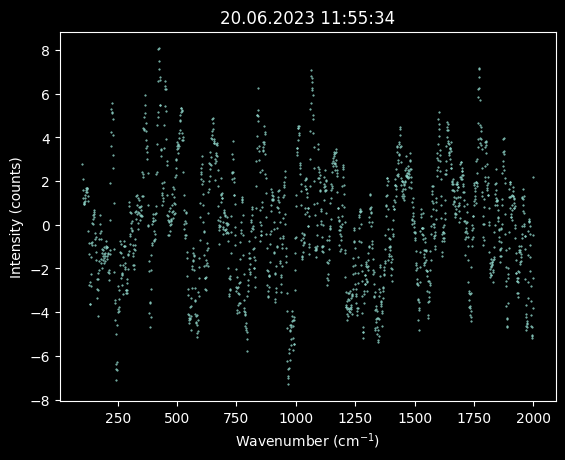

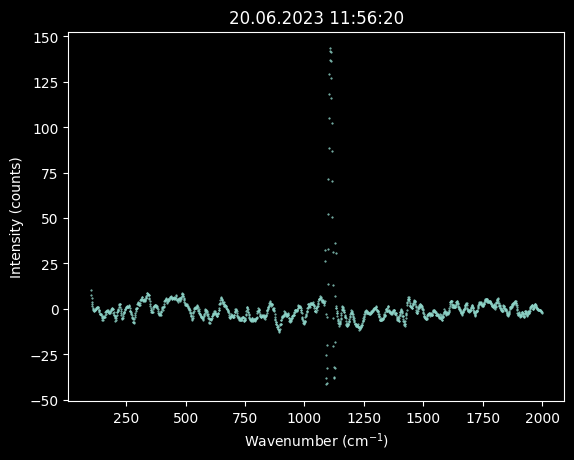

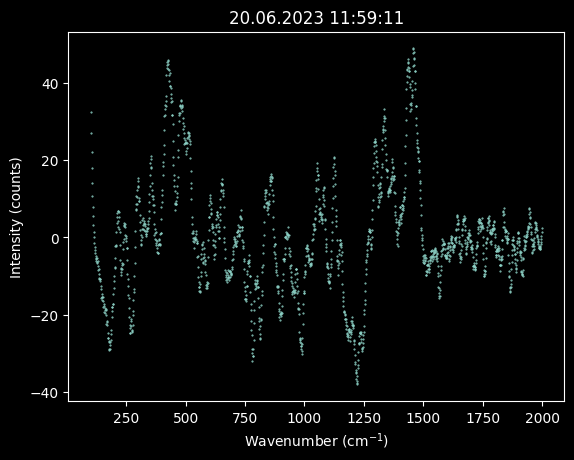

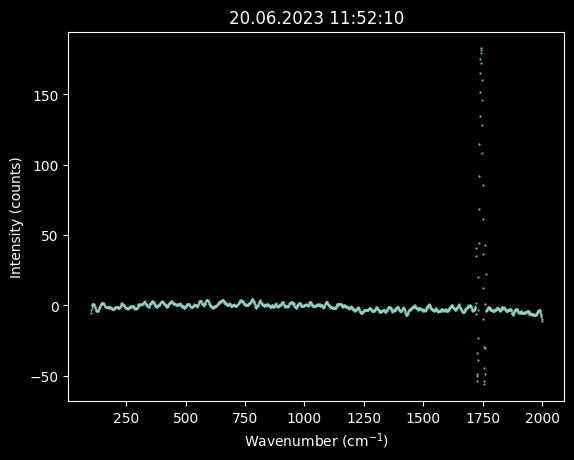

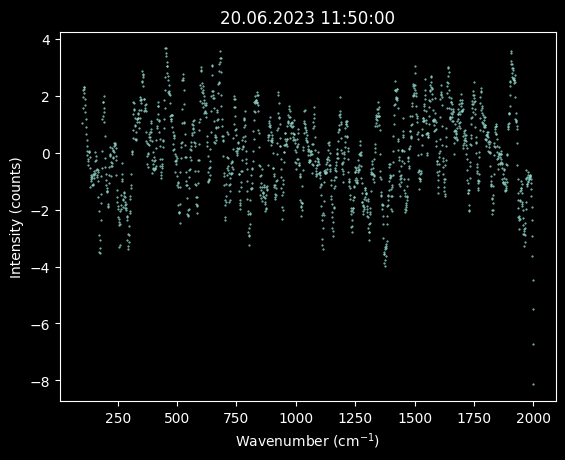

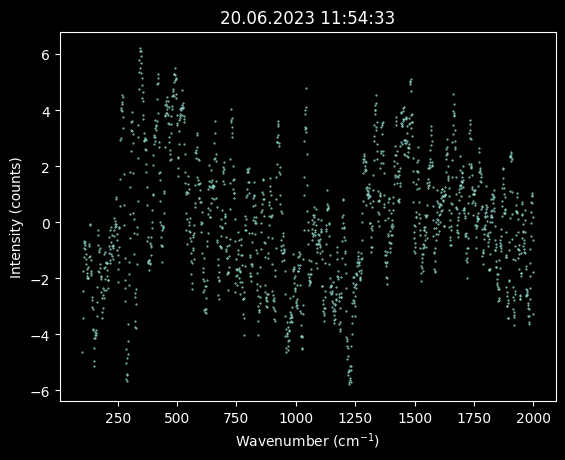

<Figure size 640x480 with 0 Axes>

In [9]:
for k, v in ramans.ramanspecs.items():
    v.sav_gol(x=v.polylx, y=v.polyly, window=40, order=4)
    

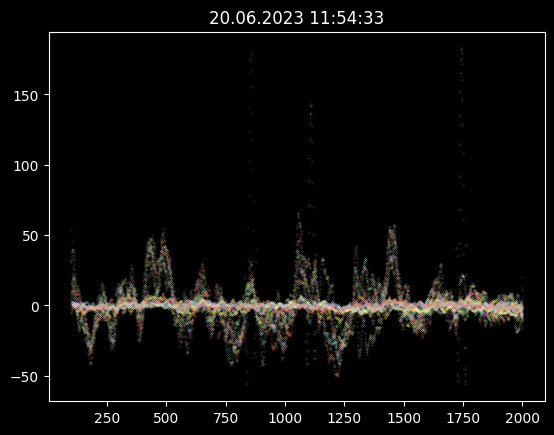

In [10]:
for k,v in ramans.ramanspecs.items():
    plt.title(k)
    plt.plot(v.denoisedx, v.denoisedy,'o',markersize=0.1)

In [11]:
import numpy as np

def remove_outliers(x, y, threshold=1.5):
    # Compute the interquartile range (IQR) for the y values
    q25, q75 = np.percentile(y, [25, 75])
    iqr = q75 - q25

    # Define the upper and lower bounds for outliers
    lower_bound = q25 - threshold * iqr
    upper_bound = q75 + threshold * iqr

    # Find the indices of the values within the bounds
    indices = np.where((y >= lower_bound) & (y <= upper_bound))[0]

    # Return the filtered arrays
    return x[indices], y[indices]


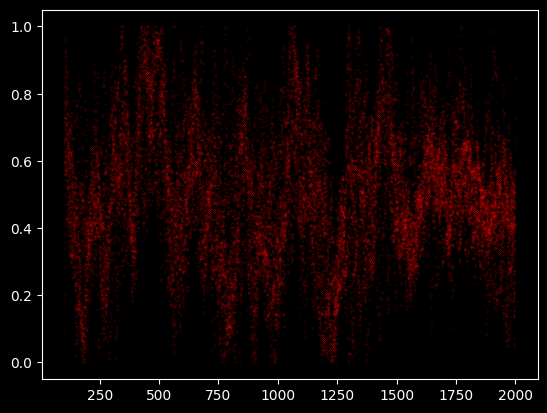

In [25]:
for k,v in ramans.ramanspecs.items():
    dx, dy = remove_outliers(v.denoisedx, v.denoisedy, threshold=1.5)
    # Moving the data over the y axis
    dy = dy - np.min(dy)
    # Normalizing the data
    ny = dy / np.max(dy)
    nx = dx
    plt.plot(nx, ny, 'o', markersize=0.1, color='red')
    v.setprops(nx, "finalx")
    v.setprops(ny, "finaly")

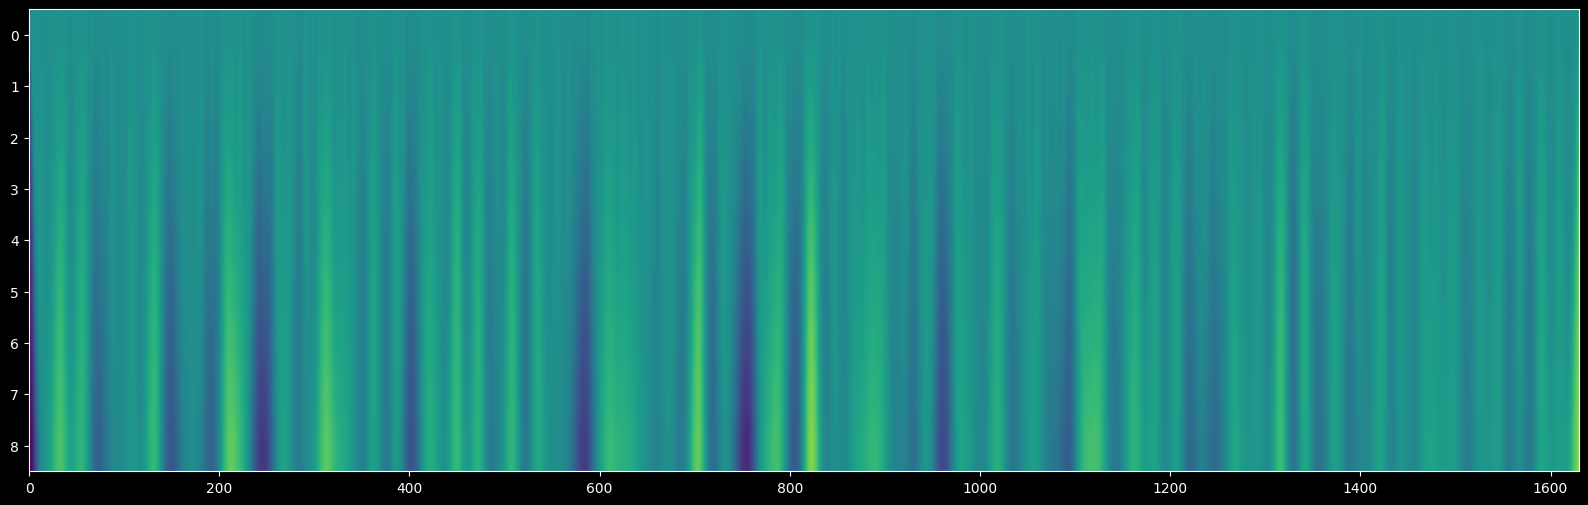

In [35]:
# Import pywt library

import pywt

plt.figure(figsize=(20,6))

# Compute the wavelet transform to plot the scalogram
for k, v in ramans.ramanspecs.items():
    coef, freqs=pywt.cwt(r.props['finaly'],np.arange(1,10),'gaus1')
    # Plot the scalogram
    plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
    # plt.show()

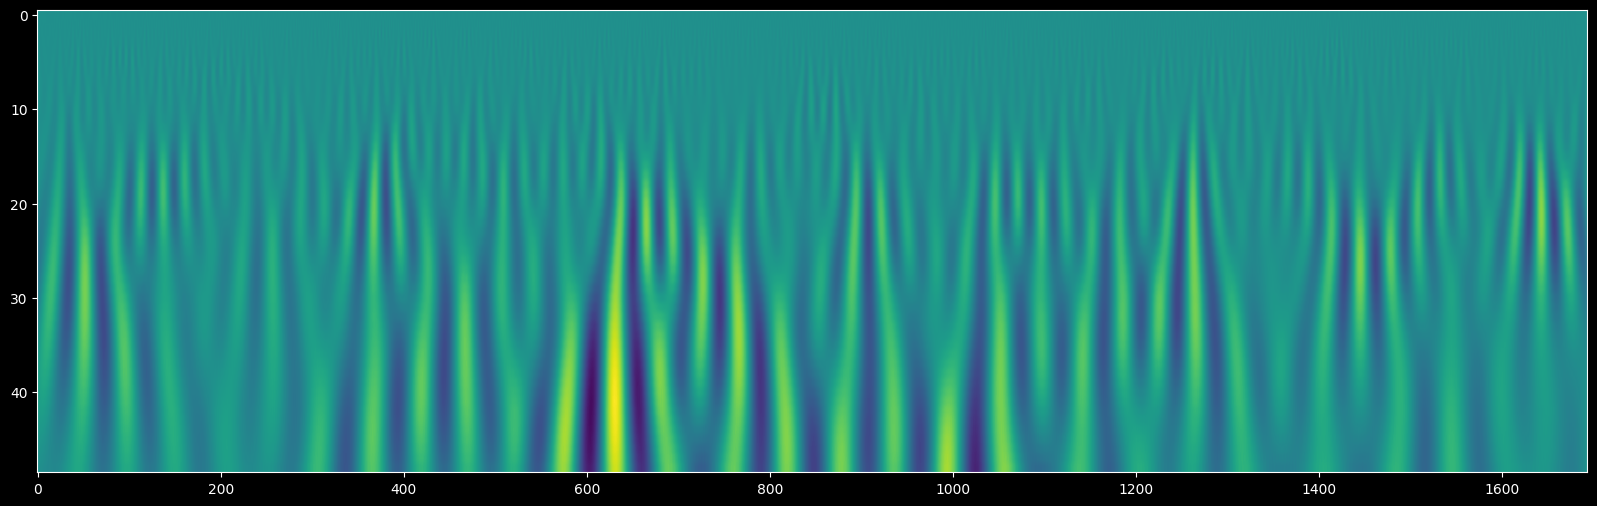

In [34]:
# Import pywt library

import pywt

# Compute the wavelet transform to plot the scalogram

for k, v in ramans.ramanspecs.items():
    

coef, freqs=pywt.cwt(r.denoisedy,np.arange(1,50),'morl')

# Plot the scalogram

plt.figure(figsize=(20,6))
plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.show()


In [17]:

pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',